In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", 999)

## **Data Preprocessing**

In [ ]:
df = pd.read_csv('abtest.csv').rename(columns = {'Find_location_1_control':'Row_picked_groupA', 'Find Location_1':'Row_picked_groupB',
                                                'Find_location_2_control':'Column_picked_groupA', 'Find Location_2':'Column_picked_groupB'})
df = df[df['DistributionChannel']=='anonymous']
df['treat'] = ~df['Row_picked_groupB'].isnull()
df = df.reset_index()
df

,index,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Please pick an item,Row_picked_groupA,Column_picked_groupA,Please pick an item.1,Row_picked_groupB,Column_picked_groupB,treat
0,7,2024-02-18 17:44:18,2024-02-18 17:50:22,IP Address,74.109.251.50,100,364,TRUE,2024-02-18 17:50:23,R_1DAuvcz6GUNGcW6,NaN,NaN,NaN,NaN,40.1678,-80.2591,anonymous,EN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,8,2024-02-18 17:50:25,2024-02-18 17:54:19,IP Address,74.109.251.50,100,233,TRUE,2024-02-18 17:54:19,R_660f8aLwdZkN2FP,NaN,NaN,NaN,NaN,40.1678,-80.2591,anonymous,EN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,9,2024-02-18 17:54:48,2024-02-18 17:55:55,IP Address,74.109.251.50,100,66,TRUE,2024-02-18 17:55:55,R_1Y1TesWOla6DNiV,NaN,NaN,NaN,NaN,40.1678,-80.2591,anonymous,EN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,10,2024-02-19 22:55:36,2024-02-19 22:55:53,IP Address,98.236.77.187,100,16,TRUE,2024-02-19 22:55:53,R_1JZsq1WHXC3vqql,NaN,NaN,NaN,NaN,40.4324,-79.9247,anonymous,EN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,13,2024-02-20 09:46:53,2024-02-20 09:47:10,IP Address,76.125.201.200,100,17,TRUE,2024-02-20 09:47:11,R_6yQcUyOhe9w4v9n,NaN,NaN,NaN,NaN,40.4442,-79.9557,anonymous,EN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
5,14,2024-02-20 09:47:16,2024-02-20 09:47:33,IP Address,76.125.201.200,100,17,TRUE,2024-02-20 09:47:34,R_3fMM1Lq6s6jqgIi,NaN,NaN,NaN,NaN,40.4442,-79.9557,anonymous,EN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
6,15,2024-02-20 09:47:36,2024-02-20 09:47:46,IP Address,76.125.201.200,100,10,TRUE,2024-02-20 09:47:47,R_5Q0lVX6CrdQC6T9,NaN,NaN,NaN,NaN,40.4442,-79.9557,anonymous,EN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
7,16,2024-02-20 09:47:49,2024-02-20 09:48:06,IP Address,76.125.201.200,100,16,TRUE,2024-02-20 09:48:06,R_7isVyCS5jKROwXk,NaN,NaN,NaN,NaN,40.4442,-79.9557,anonymous,EN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
8,19,2024-02-20 09:49:34,2024-02-20 09:49:59,IP Address,76.125.201.200,100,24,TRUE,2024-02-20 09:49:59,R_7lJsE2pwORvNLd5,NaN,NaN,NaN,NaN,40.4442,-79.9557,anonymous,EN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
9,20,2024-02-20 09:50:01,2024-02-20 09:50:18,IP Address,76.125.201.200,100,16,TRUE,2024-02-20 09:50:19,R_7Dx7co18LXrrvPg,NaN,NaN,NaN,NaN,40.4442,-79.9557,anonymous,EN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [ ]:
df = df.dropna(subset=['Q1','Q2','Q3','Q4','Q5',	'Q6',	'Q7','Q8']).reset_index(drop=True)
df.head()

,index,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Please pick an item,Row_picked_groupA,Column_picked_groupA,Please pick an item.1,Row_picked_groupB,Column_picked_groupB,treat
0,21,2024-02-20 10:09:31,2024-02-20 10:10:33,IP Address,71.112.217.136,100,61,TRUE,2024-02-20 10:10:33,R_1PB7WCDJLZGuXn6,NaN,NaN,NaN,NaN,40.473,-79.9537,anonymous,EN,31-35,Male,Yes,Almost daily! I get everything from Amazon,$51-70,I will compare between prices and brands,2-5,I use both very often,NaN,NaN,NaN,I have picked an item; Please use the second i...,2,3,True
1,22,2024-02-20 11:29:25,2024-02-20 11:32:35,IP Address,75.32.13.57,100,190,TRUE,2024-02-20 11:32:36,R_6BQ5Jhqzlj40uO3,NaN,NaN,NaN,NaN,32.961,-96.9841,anonymous,EN,31-35,Male,Yes,Once every week,$11-30,I will compare between prices and brands,More than 5,I only use Shopping Cart,I have picked an item; Please use the second i...,2,5,NaN,NaN,NaN,False
2,25,2024-02-20 16:28:00,2024-02-20 16:30:11,IP Address,128.237.82.2,100,131,TRUE,2024-02-20 16:30:12,R_7guz8bOPJAK4Z81,NaN,NaN,NaN,NaN,40.4442,-79.9557,anonymous,EN,21-25,Female,Yes,"Occasionally, depends on mood",$11-30,I will compare between prices and brands,2-5,I only use Shopping Cart,NaN,NaN,NaN,I have picked an item; Please use the second i...,1,3,True
3,26,2024-02-20 19:15:18,2024-02-20 19:15:51,IP Address,71.199.100.129,100,33,TRUE,2024-02-20 19:15:52,R_6ZJQZXgVbqwayQ4,NaN,NaN,NaN,NaN,40.4056,-80.1853,anonymous,EN,21-25,Female,No,"Rarely, only when I can't find the product eve...",$11-30,First item that comes to eyes,1,I only use Shopping Cart,NaN,5,5,NaN,NaN,NaN,False
4,27,2024-02-20 22:23:24,2024-02-20 22:25:17,IP Address,73.174.16.160,100,113,TRUE,2024-02-20 22:25:18,R_333OtM6UQGoqkkb,NaN,NaN,NaN,NaN,40.4236,-79.9825,anonymous,EN,21-25,Male,Yes,"Occasionally, depends on mood",$11-30,I always go to the brands I know personally,1,I only use Shopping Cart,NaN,NaN,NaN,I have picked an item; Please use the second i...,1,2,True


In [ ]:
df.isnull().sum()

index                     0
StartDate                 0
EndDate                   0
Status                    0
IPAddress                 0
Progress                  0
Duration (in seconds)     0
Finished                  0
RecordedDate              0
ResponseId                0
RecipientLastName        45
RecipientFirstName       45
RecipientEmail           45
ExternalReference        45
LocationLatitude          0
LocationLongitude         0
DistributionChannel       0
UserLanguage              0
Q1                        0
Q2                        0
Q3                        0
Q4                        0
Q5                        0
Q6                        0
Q7                        0
Q8                        0
Please pick an item      24
Row_picked_groupA        23
Column_picked_groupA     23
Please pick an item.1    25
Row_picked_groupB        23
Column_picked_groupB     23
treat                     0
dtype: int64

In [ ]:
Userful_columns = ['ResponseId', 'Q1','Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Row_picked_groupA', 'Column_picked_groupA', 'Row_picked_groupB', 'Column_picked_groupB', 'treat']
df = df[Userful_columns]
df = df.rename(columns={'Q1':'age', 'Q2':'gender', 'Q3':'amazon_prime', 'Q4': 'buy_amazon_freq', 'Q5': 'expense_per_order', 'Q6':'compare_items', 'Q7':'browse_items',  'Q8':'shopping_cart' })
df['treat'] = ~df['Row_picked_groupB'].isnull()
df

,ResponseId,age,gender,amazon_prime,buy_amazon_freq,expense_per_order,compare_items,browse_items,shopping_cart,Row_picked_groupA,Column_picked_groupA,Row_picked_groupB,Column_picked_groupB,treat
0,R_1PB7WCDJLZGuXn6,31-35,Male,Yes,Almost daily! I get everything from Amazon,$51-70,I will compare between prices and brands,2-5,I use both very often,NaN,NaN,2,3,True
1,R_6BQ5Jhqzlj40uO3,31-35,Male,Yes,Once every week,$11-30,I will compare between prices and brands,More than 5,I only use Shopping Cart,2,5,NaN,NaN,False
2,R_7guz8bOPJAK4Z81,21-25,Female,Yes,"Occasionally, depends on mood",$11-30,I will compare between prices and brands,2-5,I only use Shopping Cart,NaN,NaN,1,3,True
3,R_6ZJQZXgVbqwayQ4,21-25,Female,No,"Rarely, only when I can't find the product eve...",$11-30,First item that comes to eyes,1,I only use Shopping Cart,5,5,NaN,NaN,False
4,R_333OtM6UQGoqkkb,21-25,Male,Yes,"Occasionally, depends on mood",$11-30,I always go to the brands I know personally,1,I only use Shopping Cart,NaN,NaN,1,2,True
5,R_1HHP0bNRVFI4sjT,21-25,Female,Yes,Once every week,$11-30,I always go to the brands I know personally,1,I use both very often,2,5,NaN,NaN,False
6,R_5Qh4BiKFfOqEADv,21-25,Female,Yes,Once every week,Above $70,I will pick whatever Amazon picks for me,1,I only use Shopping Cart,1,5,NaN,NaN,False
7,R_6rj5MjNFS9EP2AH,21-25,Female,Yes,"Occasionally, depends on mood",$11-30,I will compare between prices and brands,2-5,I only use Shopping Cart,NaN,NaN,1,4,True
8,R_6BnYmaSiNKoGvXb,21-25,Female,Yes,"Occasionally, depends on mood",Under $10,I will compare between prices and brands,More than 5,I only use Shopping Cart,NaN,NaN,1,3,True
9,R_7cUMkw04OacMEZf,21-25,Male,Yes,Once every week,$11-30,I will compare between prices and brands,More than 5,I only use Shopping Cart,3,1,NaN,NaN,False


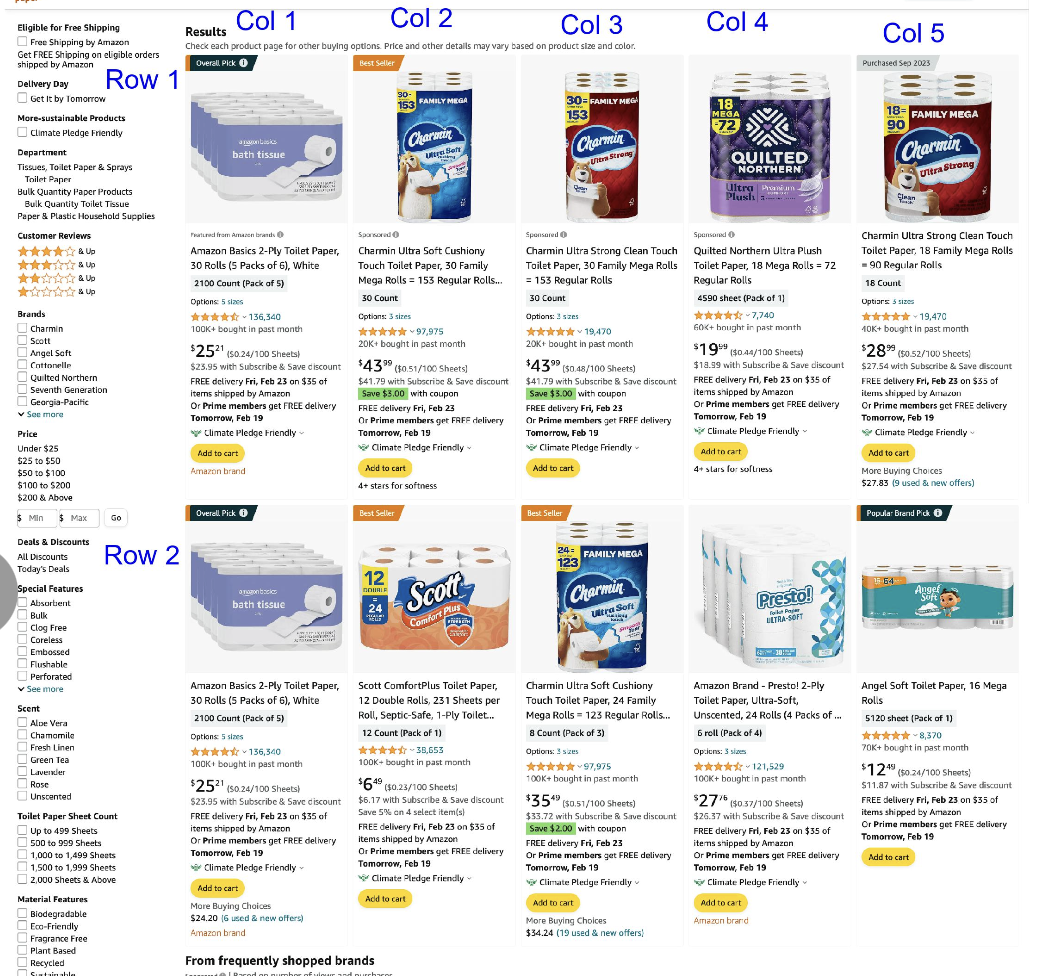

## **EDA**

<Axes: xlabel='amazon_prime', ylabel='Count'>

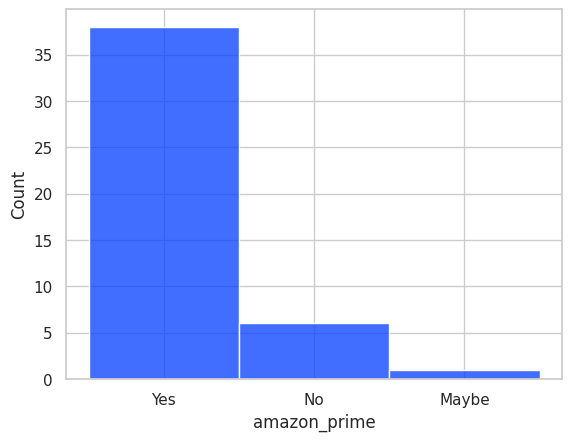

In [ ]:
sns.set(style='whitegrid', palette = 'bright')
sns.histplot(df['amazon_prime'])


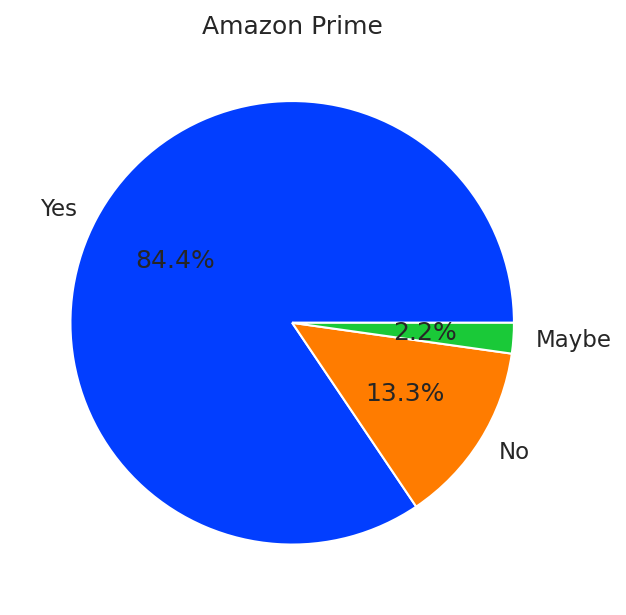

In [ ]:
plt.figure(dpi=150)
name = 'amazon_prime'
plt.pie(df[name].value_counts(), labels=df[name].value_counts().index, autopct='%1.1f%%')
plt.title('Amazon Prime')
plt.show()

<Axes: xlabel='age', ylabel='Count'>

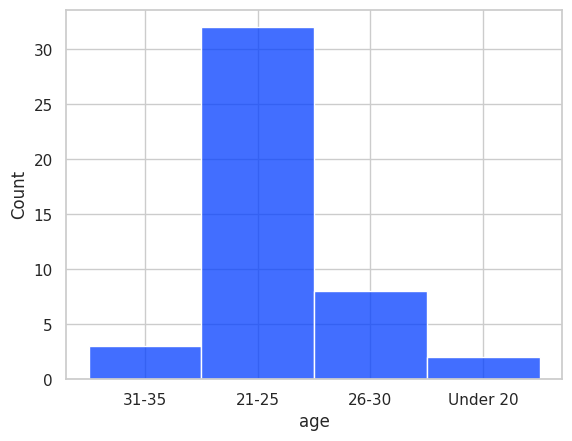

In [ ]:
sns.histplot(df['age'])

In [ ]:
df['buy_amazon_freq'].value_counts()

Occasionally, depends on mood                                 23
Once every week                                               10
Rarely, only when I can't find the product everywhere else     8
Almost daily! I get everything from Amazon                     4
Name: buy_amazon_freq, dtype: int64

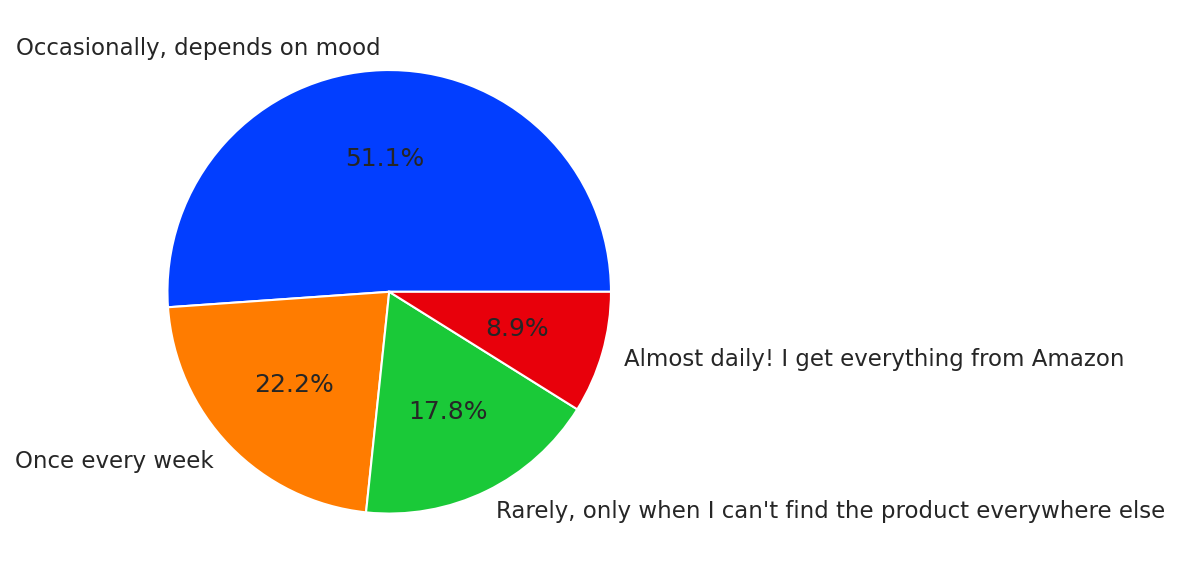

In [ ]:
plt.figure(dpi=150)
name = 'buy_amazon_freq'
plt.pie(df[name].value_counts(), labels=df[name].value_counts().index, autopct='%1.1f%%')
plt.show()

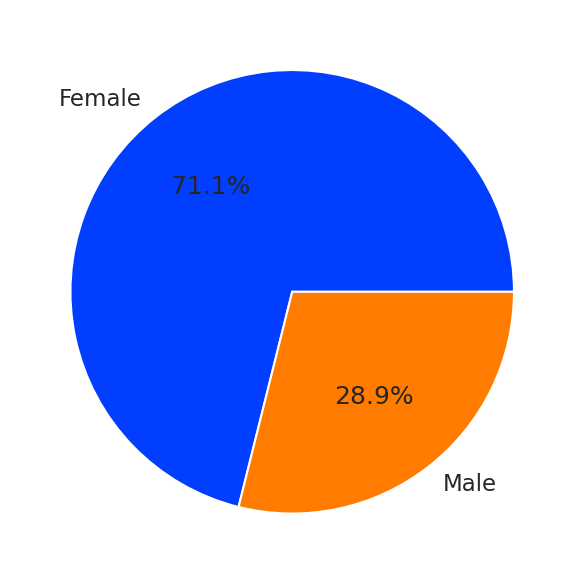

In [ ]:
plt.figure(dpi=150)
name = 'gender'
plt.pie(df[name].value_counts(), labels=df[name].value_counts().index, autopct='%1.1f%%')
plt.show()

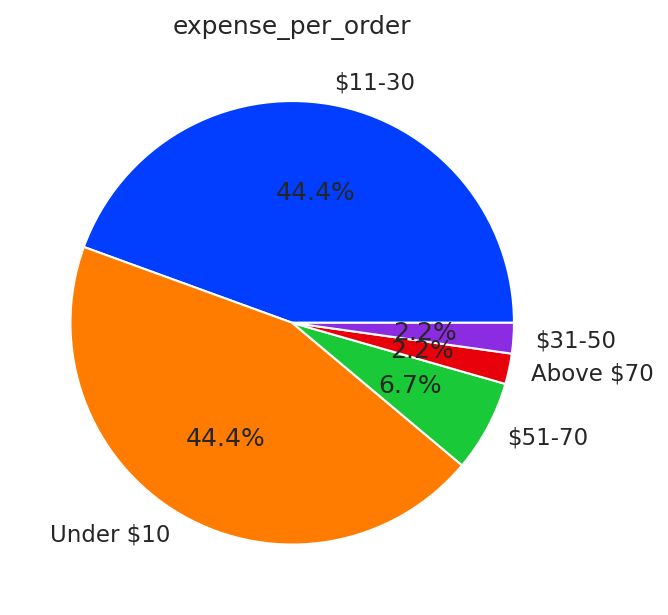

In [ ]:
plt.figure(dpi=150)
name = 'expense_per_order'
plt.pie(df[name].value_counts(), labels=df[name].value_counts().index, autopct='%1.1f%%')
plt.title(name)
plt.show()

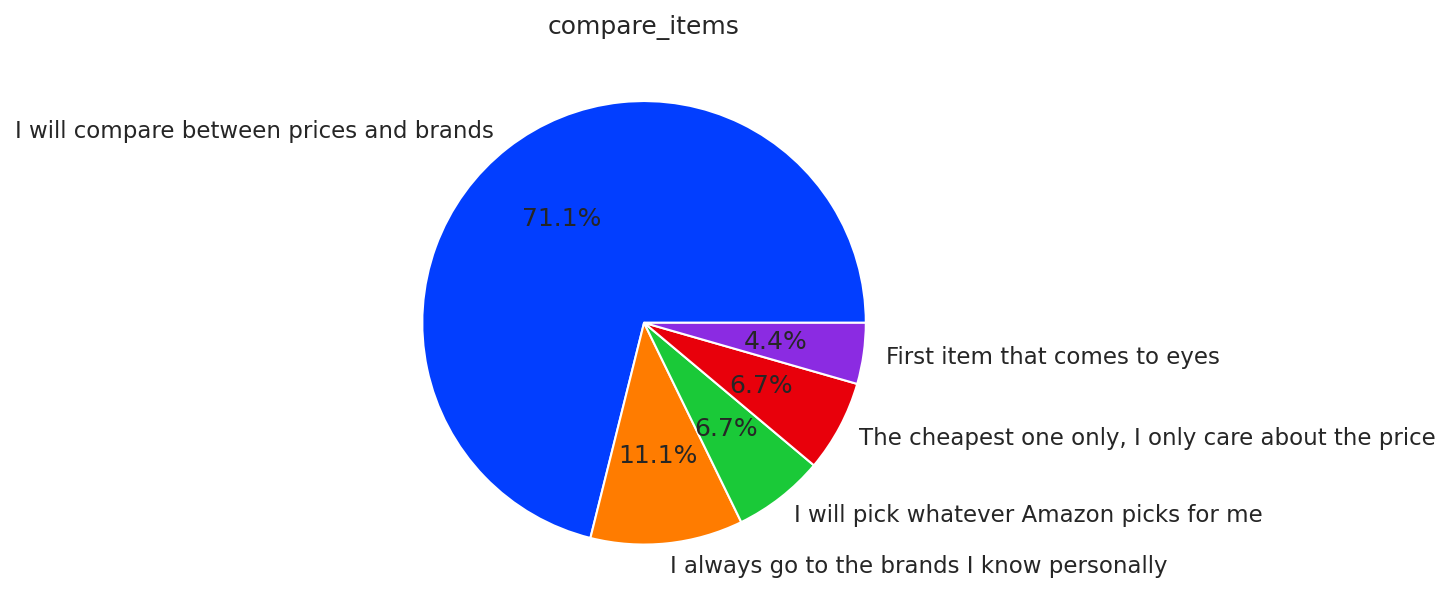

In [ ]:
plt.figure(dpi=150)
name = 'compare_items'
plt.pie(df[name].value_counts(), labels=df[name].value_counts().index, autopct='%1.1f%%')
plt.title(name)
plt.show()

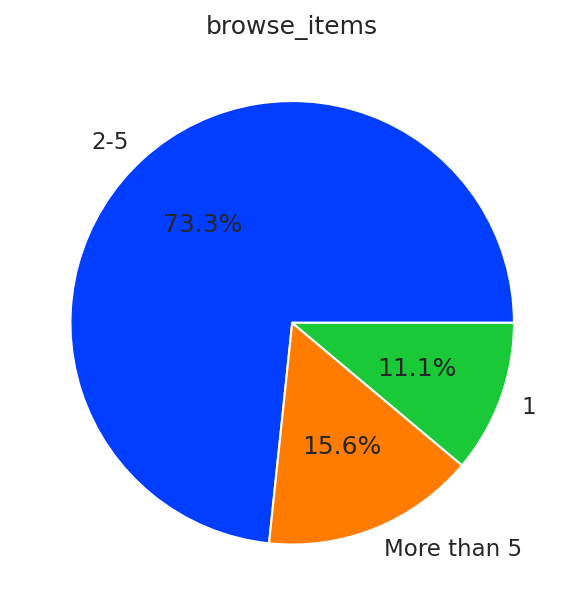

In [ ]:
plt.figure(dpi=150)
name = 'browse_items'
plt.pie(df[name].value_counts(), labels=df[name].value_counts().index, autopct='%1.1f%%')
plt.title(name)
plt.show()

In [ ]:
df.head()

,ResponseId,age,gender,amazon_prime,buy_amazon_freq,expense_per_order,compare_items,browse_items,shopping_cart,Row_picked_groupA,Column_picked_groupA,Row_picked_groupB,Column_picked_groupB,treat
0,R_1PB7WCDJLZGuXn6,31-35,Male,Yes,Almost daily! I get everything from Amazon,$51-70,I will compare between prices and brands,2-5,I use both very often,NaN,NaN,2,3,True
1,R_6BQ5Jhqzlj40uO3,31-35,Male,Yes,Once every week,$11-30,I will compare between prices and brands,More than 5,I only use Shopping Cart,2,5,NaN,NaN,False
2,R_7guz8bOPJAK4Z81,21-25,Female,Yes,"Occasionally, depends on mood",$11-30,I will compare between prices and brands,2-5,I only use Shopping Cart,NaN,NaN,1,3,True
3,R_6ZJQZXgVbqwayQ4,21-25,Female,No,"Rarely, only when I can't find the product eve...",$11-30,First item that comes to eyes,1,I only use Shopping Cart,5,5,NaN,NaN,False
4,R_333OtM6UQGoqkkb,21-25,Male,Yes,"Occasionally, depends on mood",$11-30,I always go to the brands I know personally,1,I only use Shopping Cart,NaN,NaN,1,2,True


## **T-test**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
labeled_prod_control = pd.DataFrame([[1,1],[1,2], [2,1], [2,2], [2,3]], columns=['row', 'column'])   # row, column for labeled product in control group
labeled_prod_treatment = pd.DataFrame([[1,1],[1,2], [1,3], [1,4], [1,5]], columns=['row', 'column'])  #we grouped the labeled product on the first row
df['Row_picked_groupA'] = df['Row_picked_groupA'].fillna(0).astype(int)
df['Row_picked_groupB'] = df['Row_picked_groupB'].fillna(0).astype(int)
df['Column_picked_groupA'] = df['Column_picked_groupA'].fillna(0).astype(int)
df['Column_picked_groupB'] = df['Column_picked_groupB'].fillna(0).astype(int)


df_control = df[df['treat']==False]
df_treat   = df[df['treat']==True]
df['choose_labeled'] = False
print("control group size", len(df[df['treat']==False]), "treatment group size", len(df[df['treat']==True]))
df_control_choose_labeled = df_control.merge(labeled_prod_control, 'inner', left_on=['Row_picked_groupA', 'Column_picked_groupA'], right_on=['row', 'column'])
df_treat_choose_labeled   = df_treat.merge(labeled_prod_treatment, 'inner', left_on=['Row_picked_groupB', 'Column_picked_groupB'], right_on=['row', 'column'])
print("Choosed labels control group vs treatment group:")
len(df_control_choose_labeled),len(df_treat_choose_labeled)

control group size 23 treatment group size 22
Choosed labels control group vs treatment group:


(11, 15)

In [ ]:
choosed_labeled_id = list(df_control_choose_labeled['ResponseId'].values)+ list(df_treat_choose_labeled['ResponseId'].values)
df.loc[df['ResponseId'].isin(choosed_labeled_id), 'choose_labeled'] = True
df_control = df[df['treat']==False]
df_treat   = df[df['treat']==True]
df

,ResponseId,age,gender,amazon_prime,buy_amazon_freq,expense_per_order,compare_items,browse_items,shopping_cart,Row_picked_groupA,Column_picked_groupA,Row_picked_groupB,Column_picked_groupB,treat,choose_labeled
0,R_1PB7WCDJLZGuXn6,31-35,Male,Yes,Almost daily! I get everything from Amazon,$51-70,I will compare between prices and brands,2-5,I use both very often,0,0,2,3,True,False
1,R_6BQ5Jhqzlj40uO3,31-35,Male,Yes,Once every week,$11-30,I will compare between prices and brands,More than 5,I only use Shopping Cart,2,5,0,0,False,False
2,R_7guz8bOPJAK4Z81,21-25,Female,Yes,"Occasionally, depends on mood",$11-30,I will compare between prices and brands,2-5,I only use Shopping Cart,0,0,1,3,True,True
3,R_6ZJQZXgVbqwayQ4,21-25,Female,No,"Rarely, only when I can't find the product eve...",$11-30,First item that comes to eyes,1,I only use Shopping Cart,5,5,0,0,False,False
4,R_333OtM6UQGoqkkb,21-25,Male,Yes,"Occasionally, depends on mood",$11-30,I always go to the brands I know personally,1,I only use Shopping Cart,0,0,1,2,True,True
5,R_1HHP0bNRVFI4sjT,21-25,Female,Yes,Once every week,$11-30,I always go to the brands I know personally,1,I use both very often,2,5,0,0,False,False
6,R_5Qh4BiKFfOqEADv,21-25,Female,Yes,Once every week,Above $70,I will pick whatever Amazon picks for me,1,I only use Shopping Cart,1,5,0,0,False,False
7,R_6rj5MjNFS9EP2AH,21-25,Female,Yes,"Occasionally, depends on mood",$11-30,I will compare between prices and brands,2-5,I only use Shopping Cart,0,0,1,4,True,True
8,R_6BnYmaSiNKoGvXb,21-25,Female,Yes,"Occasionally, depends on mood",Under $10,I will compare between prices and brands,More than 5,I only use Shopping Cart,0,0,1,3,True,True
9,R_7cUMkw04OacMEZf,21-25,Male,Yes,Once every week,$11-30,I will compare between prices and brands,More than 5,I only use Shopping Cart,3,1,0,0,False,False


In [ ]:
df_treat['choose_labeled'].mean() - df_control['choose_labeled'].mean()

0.20355731225296436

In [ ]:
from scipy import stats
def perform_t_tests(df1, df2, variable):
    return stats.ttest_ind(df1[variable], df2[variable], equal_var=False)

perform_t_tests(df_treat, df_control,'choose_labeled')

TtestResult(statistic=1.3827060474649557, pvalue=0.17389807358075526, df=42.97641631983383)

In [ ]:
df_metrics = pd.DataFrame([[0.2035, 1.3827, 0.1738]], columns=['Treatment_Effect', 'T-stats', 'P-value'])
df_metrics.index = ['result']

## **Logistic Regression Model**

In [ ]:
df_encoded = df[df.columns.difference(['ResponseId'])]
df_encoded['gender'] =  df_encoded['gender'].apply(lambda x:1 if x=='Male' else 0)

age_map = {'Under 20':1,  '21-25':2,  '26-30':3, '31-35':4}
age_map_reverse = {value: key for key, value in age_map.items()}
df_encoded['age'] = df_encoded['age'].apply(lambda x: age_map[x])

amazon_prime_map = {'No':0,  'Maybe':0.5,  'Yes':1}
amazon_prime_map_reverse = {value: key for key, value in amazon_prime_map.items()}
df_encoded['amazon_prime'] = df_encoded['amazon_prime'].apply(lambda x: amazon_prime_map[x])

amazon_freq_map = {"Rarely, only when I can't find the product everywhere else":0,  'Occasionally, depends on mood':0.2,  'Once every week':1, 'Almost daily! I get everything from Amazon':7}
amazon_freq_map_reverse = {0:"Rarely",  0.2:'Occasionally',  1:'Once every week', 7:'Almost daily'}
df_encoded['buy_amazon_freq'] = df_encoded['buy_amazon_freq'].apply(lambda x: amazon_freq_map[x])

expense_map = {'Under $10':1,  '$11-30':2,  '$31-50':3, '$51-70':4, 'Above $70':5}
expense_map_reverse = {value: key for key, value in expense_map.items()}
df_encoded['expense_per_order'] = df_encoded['expense_per_order'].apply(lambda x: expense_map[x])

browse_map = {'1':1,  '2-5':3.5,  'More than 5':10}
browse_map_reverse = {value: key for key, value in browse_map.items()}
df_encoded['browse_items'] = df_encoded['browse_items'].apply(lambda x: browse_map[x])

compare_map = {'First item that comes to eyes':1,  'I will pick whatever Amazon picks for me ':2,  'I always go to the brands I know personally':3, 'I will compare between prices and brands':4, 'The cheapest one only, I only care about the price':5}
compare_map_reverse = {1:'First eye',  2:'Amazon Picks',  3:'Known brands', 4:'Compare price brands', 5:'Cheapest only'}
df_encoded['compare_items'] = df_encoded['compare_items'].apply(lambda x: compare_map[x])
# cart_map = {'I use both very often':3,  'I only use Shopping Cart':2,  'I always Buy Now':1}
# df_encoded['shopping_cart'] = df_encoded['shopping_cart'].apply(lambda x: cart_map[x])

df_encoded = pd.get_dummies(df_encoded, drop_first=True)
df_encoded


,Column_picked_groupA,Column_picked_groupB,Row_picked_groupA,Row_picked_groupB,age,amazon_prime,browse_items,buy_amazon_freq,choose_labeled,compare_items,expense_per_order,gender,treat,shopping_cart_I only use Shopping Cart,shopping_cart_I use both very often
0,0,3,0,2,4,1.0,3.5,7.0,False,4,4,1,True,0,1
1,5,0,2,0,4,1.0,10.0,1.0,False,4,2,1,False,1,0
2,0,3,0,1,2,1.0,3.5,0.2,True,4,2,0,True,1,0
3,5,0,5,0,2,0.0,1.0,0.0,False,1,2,0,False,1,0
4,0,2,0,1,2,1.0,1.0,0.2,True,3,2,1,True,1,0
5,5,0,2,0,2,1.0,1.0,1.0,False,3,2,0,False,0,1
6,5,0,1,0,2,1.0,1.0,1.0,False,2,5,0,False,1,0
7,0,4,0,1,2,1.0,3.5,0.2,True,4,2,0,True,1,0
8,0,3,0,1,2,1.0,10.0,0.2,True,4,1,0,True,1,0
9,1,0,3,0,2,1.0,10.0,1.0,False,4,2,1,False,1,0


<Axes: >

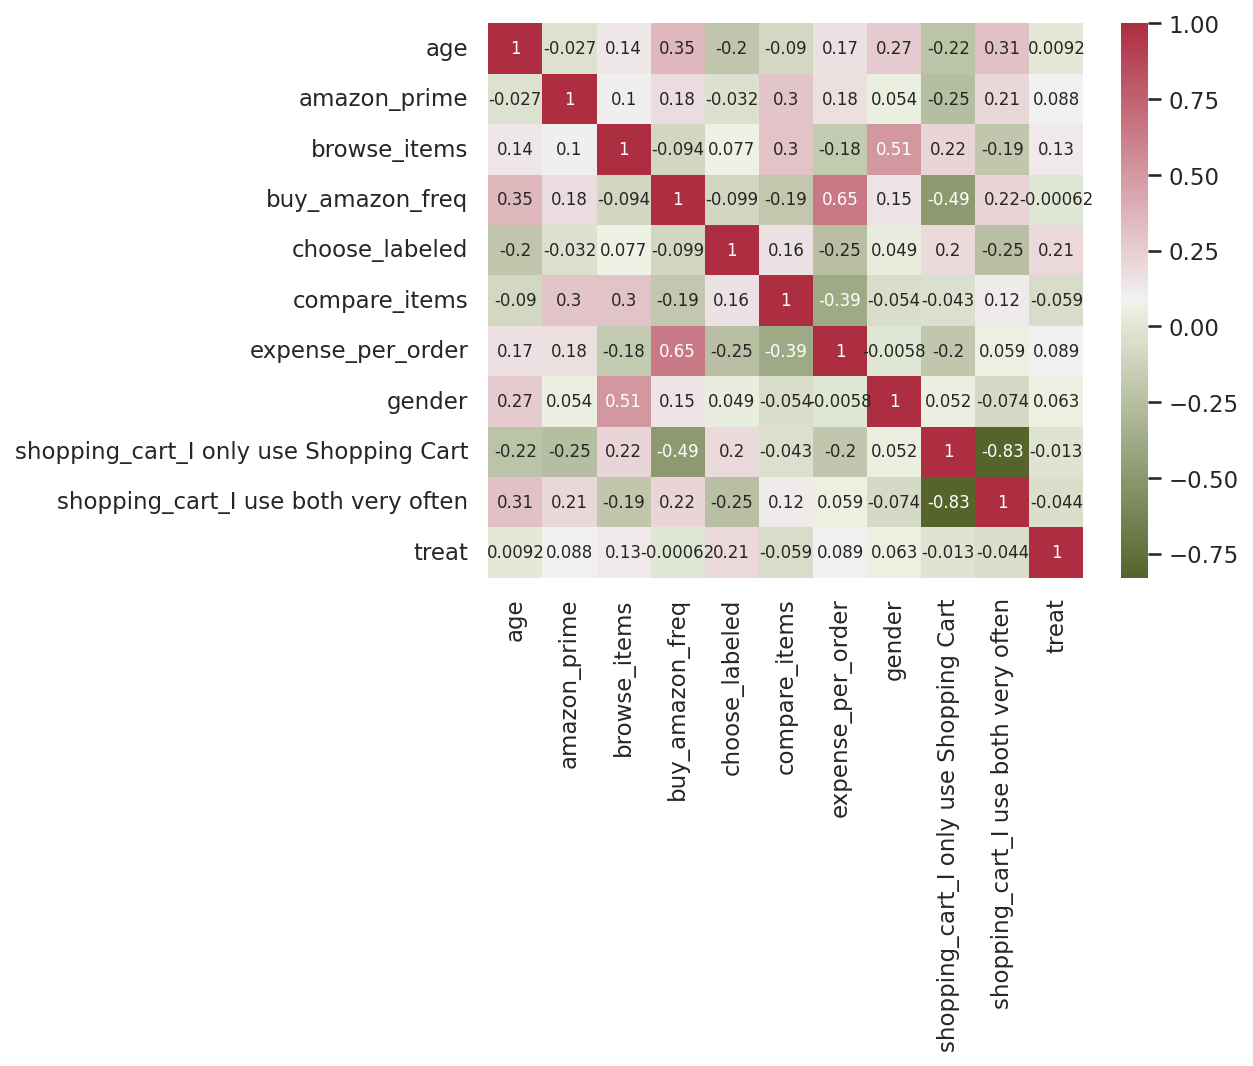

In [ ]:
plt.figure(dpi=150)
corr = df_encoded[df_encoded.columns.difference(['Column_picked_groupA', 'Column_picked_groupB', 'Row_picked_groupA', 'Row_picked_groupB'])].corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(100, 7, s=75, l=40,
                            n=5, center="light", as_cmap=True)
sns.heatmap(corr,cmap=cmap, annot=True, annot_kws={"fontsize":8})

<Axes: >

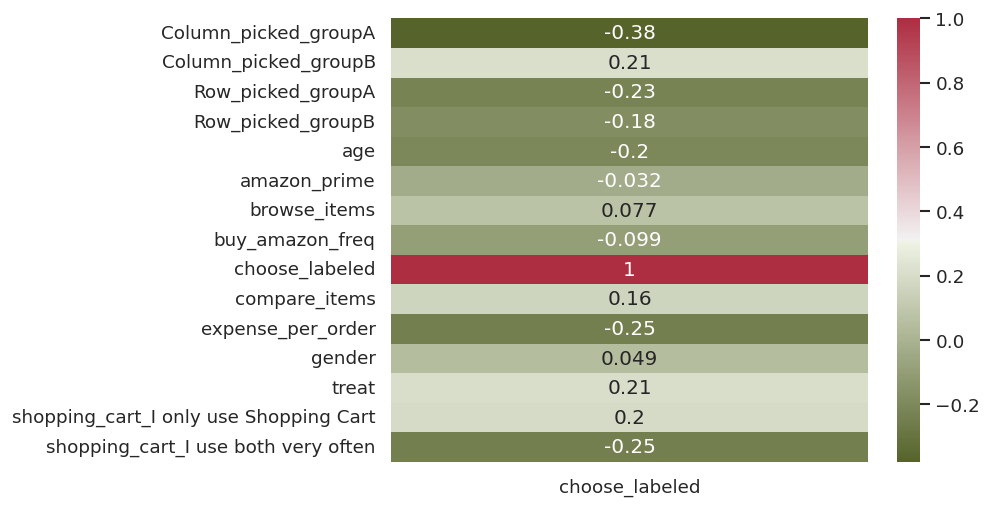

In [ ]:
plt.figure(dpi=120)
sns.heatmap(df_encoded.corr()[['choose_labeled']],cmap=cmap, annot=True)

In [ ]:

df_reg = df_encoded[df_encoded.columns.difference(['ResponseId','Column_picked_groupA', 'Column_picked_groupB', 'Row_picked_groupA', 'Row_picked_groupB', ''])]
import statsmodels.api as sm
X = df_reg[df_reg.columns.difference(['choose_labeled'])].astype(float)
y = df_reg['choose_labeled']
X = sm.add_constant(X)

model = sm.Logit(y, X)
model = model.fit()

model.summary()


Optimization terminated successfully.
         Current function value: 0.544783
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         choose_labeled   No. Observations:                   45
Model:                          Logit   Df Residuals:                       34
Method:                           MLE   Df Model:                           10
Date:                Wed, 28 Feb 2024   Pseudo R-squ.:                  0.2000
Time:                        02:07:36   Log-Likelihood:                -24.515
converged:                       True   LL-Null:                       -30.645
Covariance Type:            nonrobust   LLR p-value:                    0.2681
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      1.4341      2.932      0.489      0.625      -4.312       7.181
age                                       -0.7805      0.680     -1.148      0.251      -2.113       0.552
amazon_prime                              -0.3460      1.169     -0.296      0.767      -2.637       1.945
browse_items                              -0.1140      0.192     -0.593      0.553      -0.491       0.263
buy_amazon_freq                            0.5592      0.414      1.350      0.177      -0.253       1.371
compare_items                              0.5326      0.553      0.963      0.335      -0.551       1.616
expense_per_order                         -1.3734      0.788     -1.743      0.081      -2.918       0.171
gender                                     0.5427      1.066      0.509      0.611      -1.547       2.632
shopping_cart_I only use Shopping Cart     0.8937      1.785      0.501      0.617      -2.604       4.391
shopping_cart_I use both very often       -0.7707      1.875     -0.411      0.681      -4.446       2.905
treat                                      1.4787      0.807      1.833      0.067      -0.102       3.060
==========================================================================================================
"""

<font color="red"> **Interaction Term to study segmentation**

In [ ]:

# df_reg = df_encoded[df_encoded.columns.difference(['ResponseId','Column_picked_groupA', 'Column_picked_groupB', 'Row_picked_groupA', 'Row_picked_groupB', ''])]
df_reg_interact = df_reg.copy()
df_reg_interact['gender*treat'] = df_reg_interact['gender'] * df_reg_interact['treat']
X = df_reg_interact[df_reg_interact.columns.difference(['choose_labeled'])].astype(float)
y = df_reg_interact['choose_labeled']
X = sm.add_constant(X)

model = sm.Logit(y, X)
model = model.fit()

model.summary()


Optimization terminated successfully.
         Current function value: 0.516055
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         choose_labeled   No. Observations:                   45
Model:                          Logit   Df Residuals:                       33
Method:                           MLE   Df Model:                           11
Date:                Wed, 28 Feb 2024   Pseudo R-squ.:                  0.2422
Time:                        02:07:36   Log-Likelihood:                -23.222
converged:                       True   LL-Null:                       -30.645
Covariance Type:            nonrobust   LLR p-value:                    0.1897
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      1.9770      3.132      0.631      0.528      -4.162       8.116
age                                       -1.2098      0.772     -1.568      0.117      -2.722       0.302
amazon_prime                              -0.9595      1.285     -0.747      0.455      -3.477       1.558
browse_items                              -0.1896      0.213     -0.889      0.374      -0.608       0.229
buy_amazon_freq                            0.7270      0.480      1.515      0.130      -0.214       1.668
compare_items                              0.5041      0.611      0.825      0.409      -0.693       1.701
expense_per_order                         -1.5360      0.871     -1.764      0.078      -3.242       0.170
gender                                     2.5536      1.812      1.409      0.159      -0.999       6.106
gender*treat                              -3.1132      2.025     -1.537      0.124      -7.083       0.856
shopping_cart_I only use Shopping Cart     1.9614      1.997      0.982      0.326      -1.954       5.876
shopping_cart_I use both very often        0.1047      2.072      0.051      0.960      -3.956       4.166
treat                                      2.5666      1.145      2.242      0.025       0.323       4.810
==========================================================================================================
"""

## **T-test with Segments**

In [ ]:
df_treat['compare_items'].unique()

array(['I will compare between prices and brands',
       'I always go to the brands I know personally',
       'I will pick whatever Amazon picks for me ',
       'First item that comes to eyes',
       'The cheapest one only, I only care about the price'], dtype=object)

In [ ]:
df = df.replace('Occasionally, depends on mood', 'Occasionally')
df = df.replace('Almost daily! I get everything from Amazon', 'Almost daily')
df = df.replace('I will compare between prices and brands', 'Compare price&brands')
df = df.replace("Rarely, only when I can't find the product everywhere else", "Rarely")
df = df.replace("I always go to the brands I know personally", "Known brands")
df = df.replace("I will pick whatever Amazon picks for me ", "Amazon Picks")
df = df.replace("First item that comes to eyes", "First eye")
df = df.replace("The cheapest one only, I only care about the price", "Cheapest product")
df_treat = df[df['treat']==True]
df_control = df[df['treat']==False]

In [ ]:
df_treat['compare_items'].unique()

array(['Compare price&brands', 'Known brands', 'Amazon Picks',
       'First eye', 'Cheapest product'], dtype=object)

,control_samples,treat_samples,total_samples,Effect,T-test,P-value
amazon_prime-['No'],4,2,6,0.500,1.732,0.182
"amazon_prime-['Yes', 'Maybe']",19,20,39,0.176,1.097,0.280


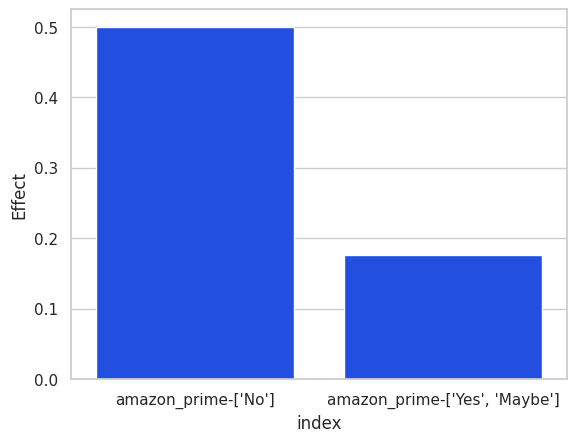

In [ ]:

def t_tests_segmented(df_treat, df_control, variable, segment, segment_value):
    nonsegmeng_list = set(df[segment].unique())-set(segment_value)
    df_treat_seg = df_treat[df_treat[segment].isin(segment_value)]
    df_control_seg = df_control[df_control[segment].isin(segment_value)]
    df_treat_nonseg = df_treat[~df_treat[segment].isin(segment_value)]
    df_control_nonseg = df_control[~df_control[segment].isin(segment_value)]
    difference = df_treat_seg[variable].mean() - df_control_seg[variable].mean()
    difference1= df_treat_nonseg[variable].mean() - df_control_nonseg[variable].mean()
    # display(df_control_nonseg)
    t_test, pvalue = stats.ttest_ind(df_treat_seg[variable], df_control_seg[variable], equal_var=False)
    t_test1, pvalue1 = stats.ttest_ind(df_treat_nonseg[variable], df_control_nonseg[variable], equal_var=False)

    results = [[len(df_control_seg), len(df_treat_seg), len(df_control_seg)+len(df_treat_seg), np.round(difference,3), np.round(t_test,3), np.round(pvalue,3)],\
     [len(df_control_nonseg), len(df_treat_nonseg),len(df_control_nonseg)+len(df_treat_nonseg), np.round(difference1,3),np.round(t_test1,3),np.round(pvalue1,3) ]]

    results = pd.DataFrame(results, columns=['control_samples', 'treat_samples','total_samples', 'Effect', 'T-test', 'P-value'])
    results.index = [segment+'-'+str(segment_value), segment+'-'+str(list(nonsegmeng_list))]
    sns.barplot(results.reset_index(), x='index', y= 'Effect')
    return results
    # print(f"{segment+'-'+str(segment_value)}, #samples{len(df_control_seg)+len(df_treat_seg)}, Effect:{np.round(difference,3)}, Tstats: {np.round(t_test,3)}, Pvalue: {np.round(pvalue,3)},\n{segment+'-'+str(nonsegmeng_list)}, #samples{len(df_control_nonseg)+len(df_treat_nonseg)}, Effect:{np.round(difference1,3)}, Tstats: {np.round(t_test1,3)}, Pvalue: {np.round(pvalue1,3)}")
    # sns.barplot()


t_tests_segmented(df_treat, df_control,'choose_labeled', segment='amazon_prime', segment_value=['No'])



,control_samples,treat_samples,total_samples,Effect,T-test,P-value
gender-['Male'],6,7,13,-0.095,-0.326,0.751
gender-['Female'],17,15,32,0.322,1.885,0.069


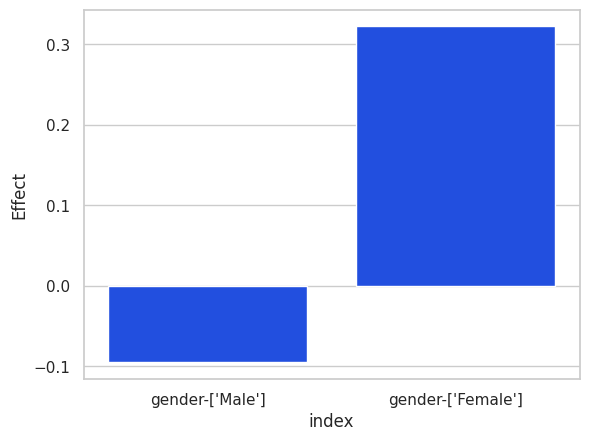

In [ ]:

t_tests_segmented(df_treat, df_control,'choose_labeled', segment='gender', segment_value=[ "Male"])

,control_samples,treat_samples,total_samples,Effect,T-test,P-value
"browse_items-['1', '2-5']",20,18,38,0.167,1.029,0.310
browse_items-['More than 5'],3,4,7,0.417,1.000,0.373


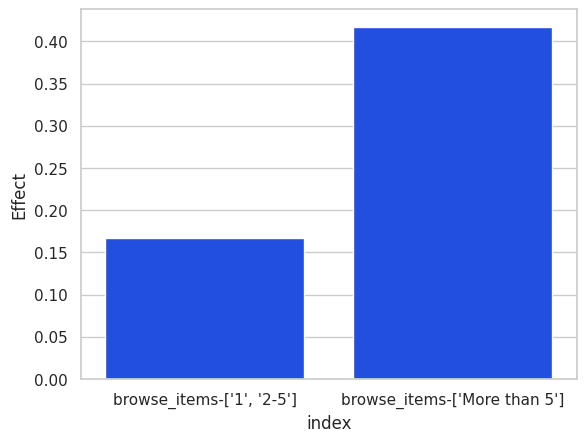

In [ ]:

t_tests_segmented(df_treat, df_control,'choose_labeled', segment='browse_items', segment_value=[ "1", "2-5"])

,control_samples,treat_samples,total_samples,Effect,T-test,P-value
compare_items-['I will compare between prices and brands'],0,0,0,NaN,NaN,NaN
"compare_items-['Known brands', 'Cheapest product', 'Compare price&brands', 'First eye', 'Amazon Picks']",23,22,45,0.204,1.383,0.174


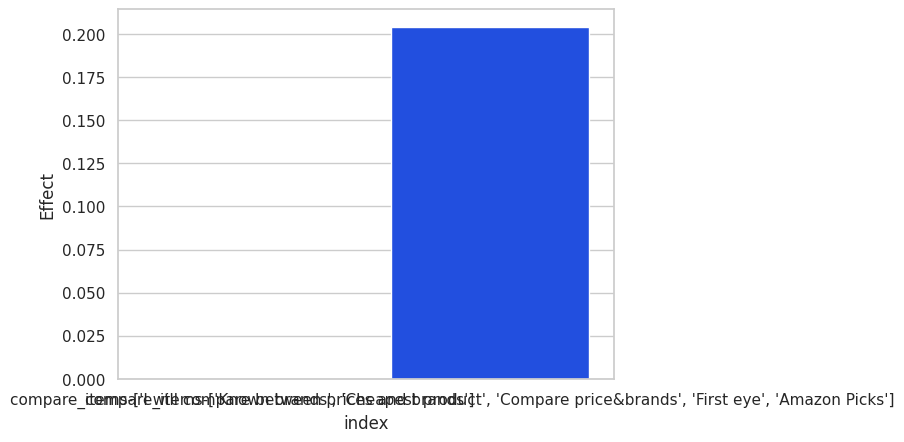

In [ ]:
t_tests_segmented(df_treat, df_control,'choose_labeled', segment='compare_items', segment_value=[ 'I will compare between prices and brands'])

,control_samples,treat_samples,total_samples,Effect,T-test,P-value
"buy_amazon_freq-[""Rarely, only when I can't find the product everywhere else""]",0,0,0,NaN,NaN,NaN
"buy_amazon_freq-['Almost daily', 'Occasionally', 'Once every week', 'Rarely']",23,22,45,0.204,1.383,0.174


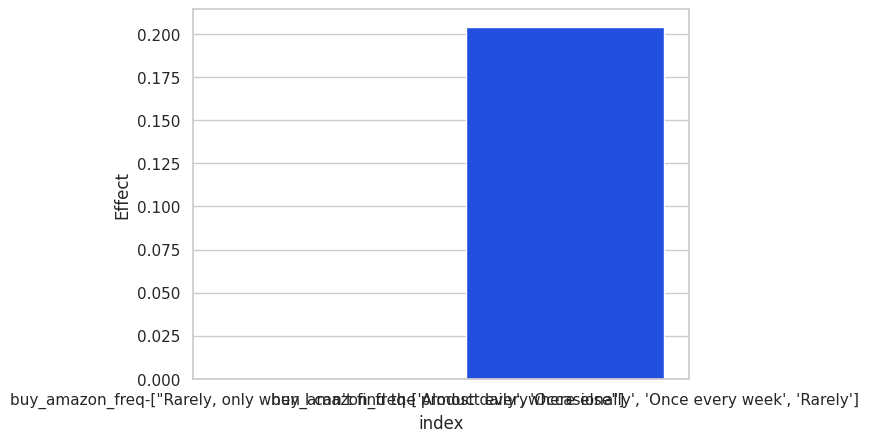

In [ ]:
t_tests_segmented(df_treat, df_control,'choose_labeled', segment='buy_amazon_freq', segment_value=[ "Rarely, only when I can't find the product everywhere else"])

<Figure size 1280x960 with 0 Axes>

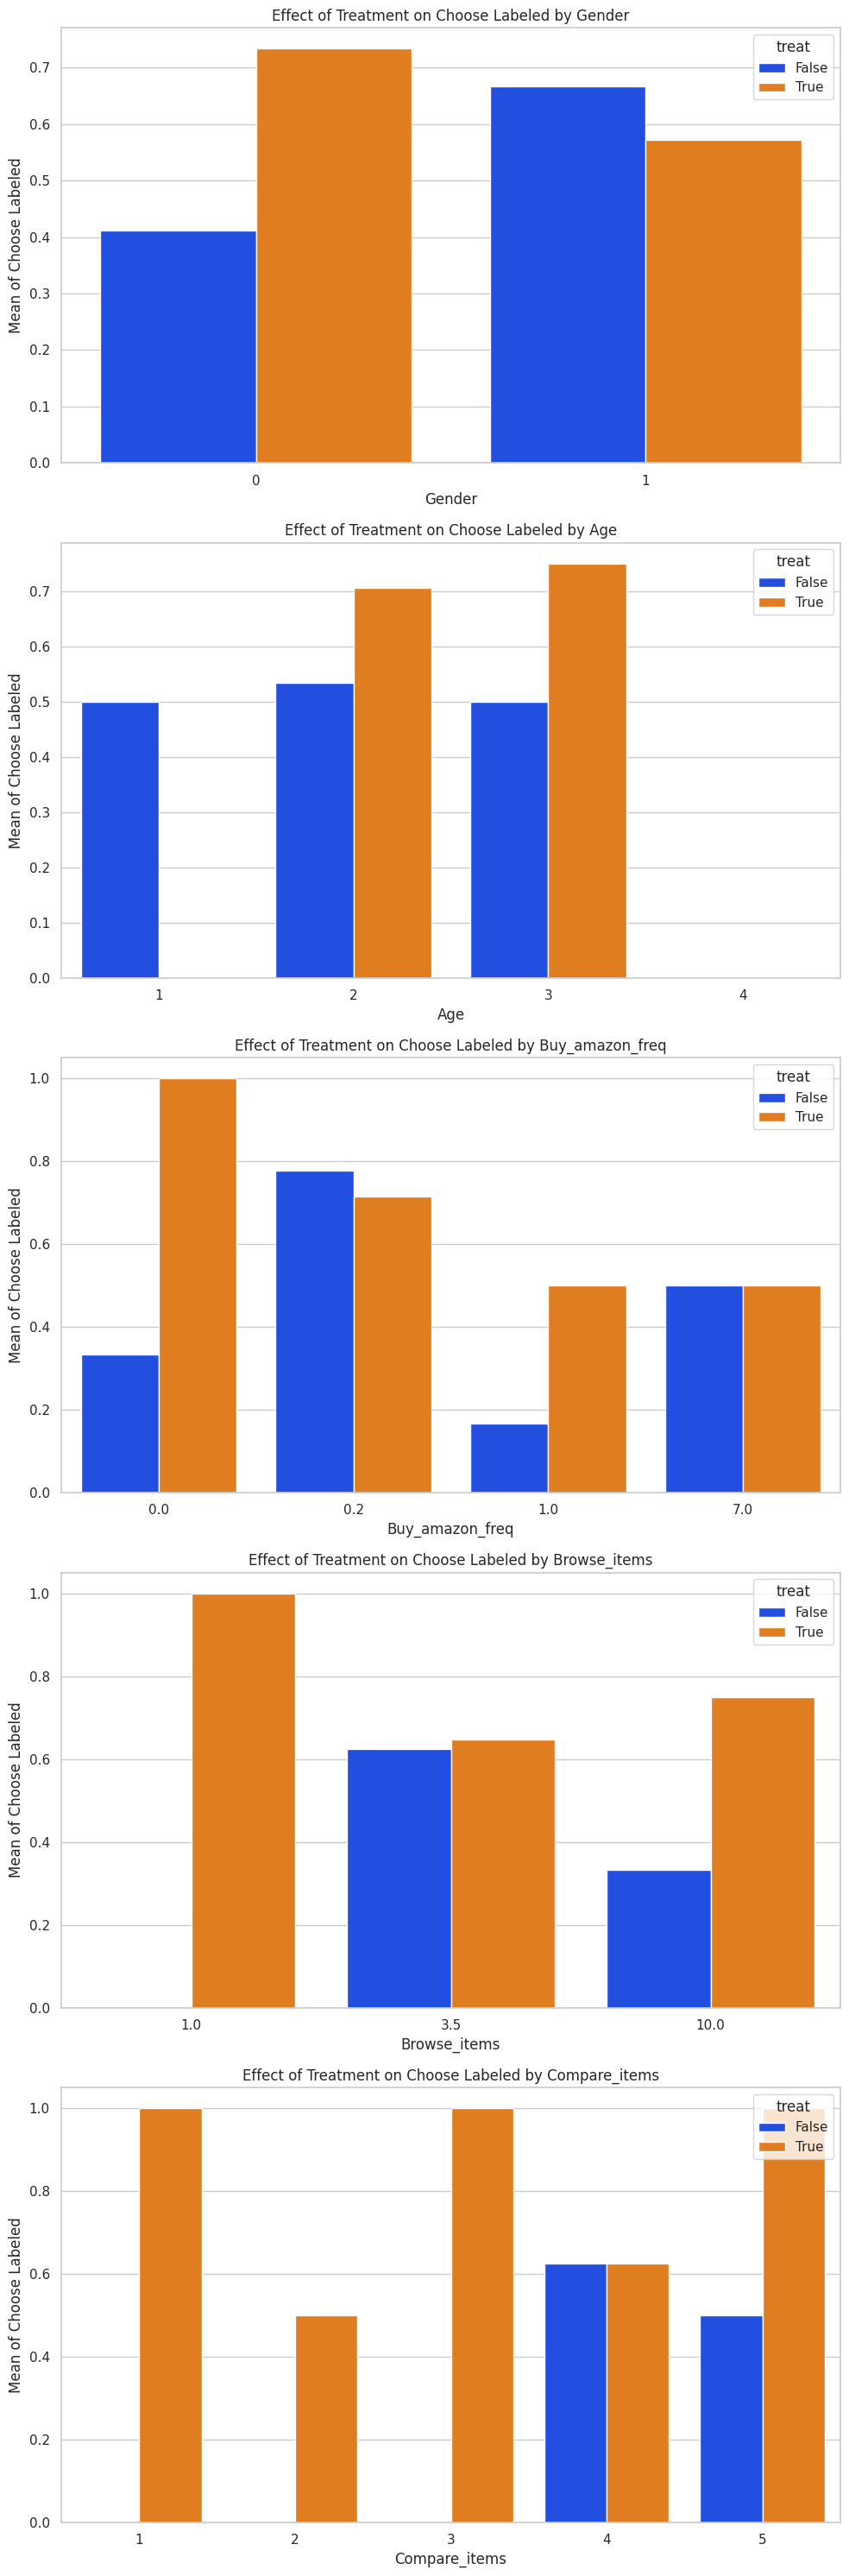

In [ ]:
# Correcting the approach for calculating and plotting treatment effect and p-value across segments

plt.figure(dpi=200)
# Calculate mean and standard deviation of 'choose_labeled' for treatment and control groups within each segment
def segment_analysis(df, segment):
    results = df.groupby([segment, 'treat'])['choose_labeled'].agg(['mean', 'std', 'count']).reset_index()
    return results

# Segments to analyze
segments = ['gender', 'age', 'buy_amazon_freq','browse_items', 'compare_items']

# Analysis results
df_abtest = df_reg
segment_results = {segment: segment_analysis(df_abtest, segment) for segment in segments}

# Plotting
fig, axes = plt.subplots(len(segments), 1, figsize=(10, 6 * len(segments)))

for i, segment in enumerate(segments):
    sns.barplot(x=segment, y='mean', hue='treat', data=segment_results[segment], ax=axes[i])
    axes[i].set_title(f'Effect of Treatment on Choose Labeled by {segment.capitalize()}')
    axes[i].set_ylabel('Mean of Choose Labeled')
    axes[i].set_xlabel(segment.capitalize())

plt.tight_layout()
plt.show()

# Note: This approach visualizes the mean difference in 'choose_labeled' between treatment and control groups within each segment.
# For a more rigorous statistical analysis, including calculation and visualization of p-values for each segment's treatment effect,
# further statistical tests and methodologies would need to be applied, which are not directly visualized here.


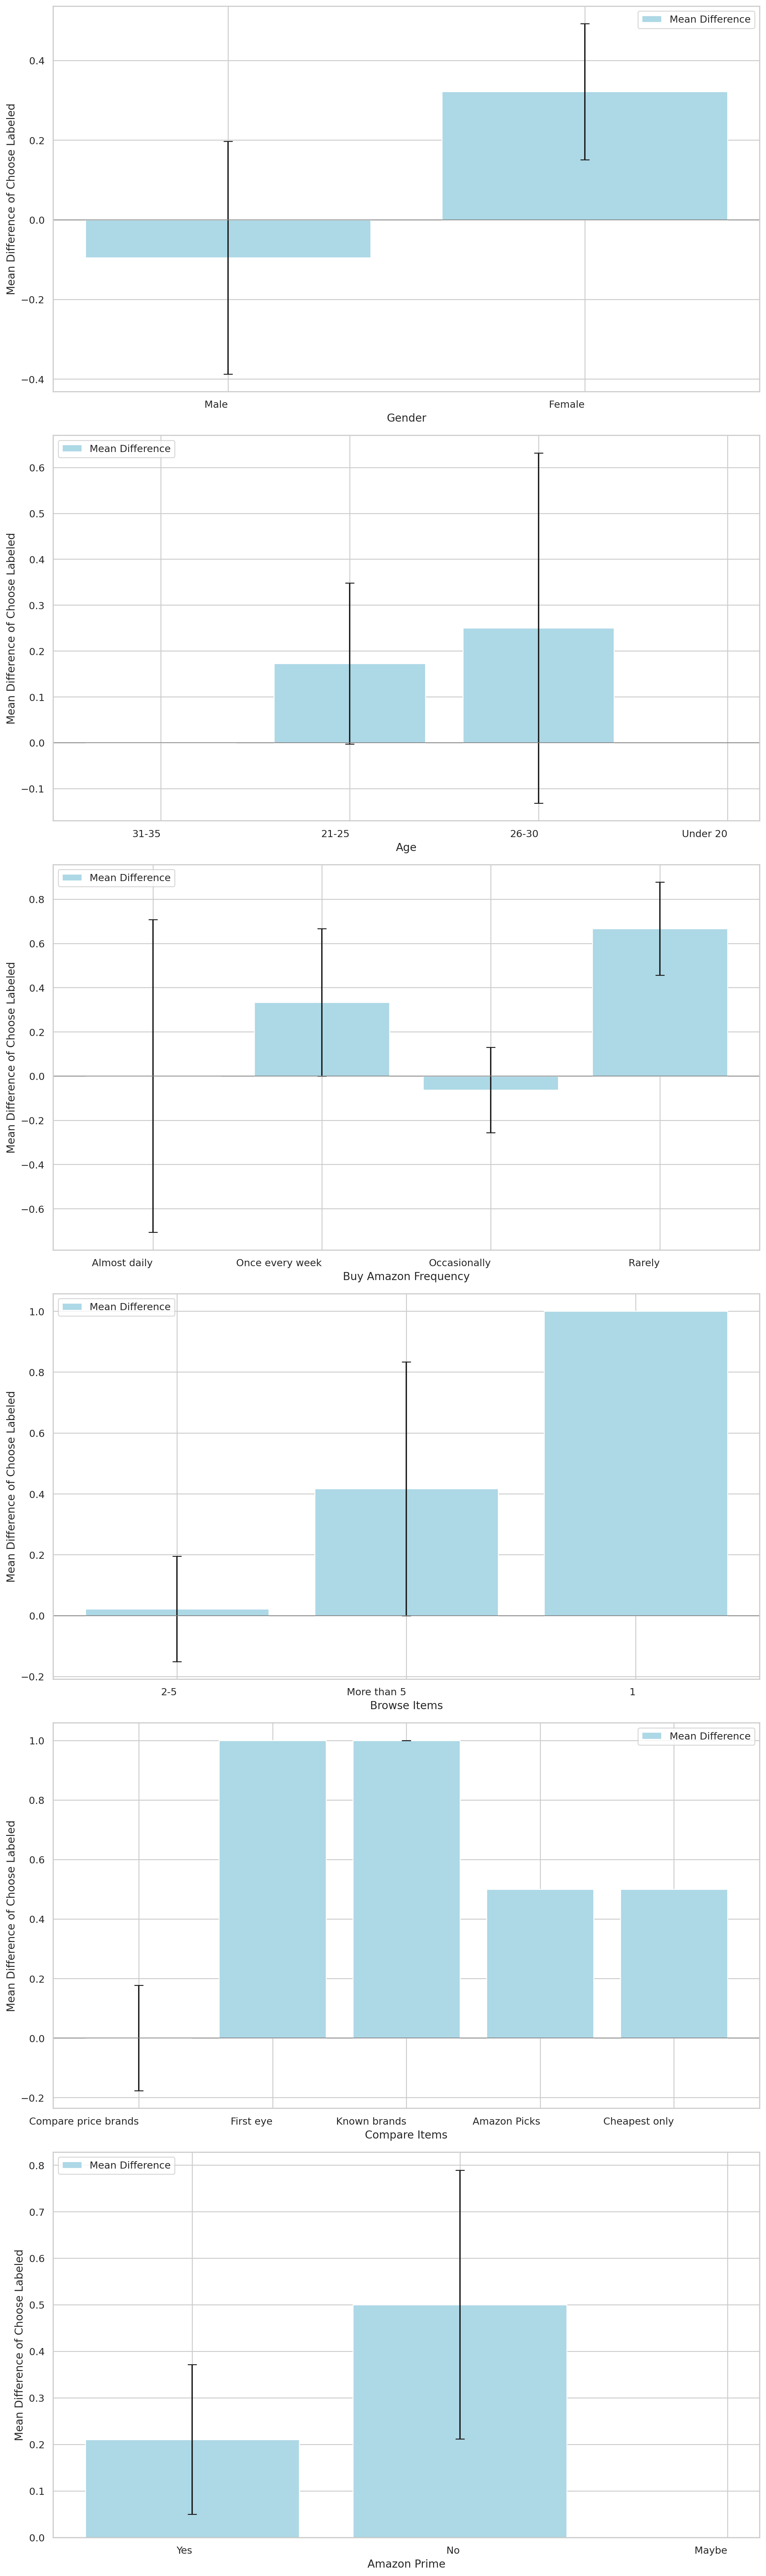

In [ ]:
# Adjust the function to handle small or zero sample sizes in segments
def calculate_ttest_segments_safe(df, segment):
    segments_unique = df[segment].dropna().unique()
    results = []

    for seg in segments_unique:
        df_seg = df[df[segment] == seg]
        control = df_seg[df_seg['treat'] == 0]['choose_labeled']
        treatment = df_seg[df_seg['treat'] == 1]['choose_labeled']

        # Skip segments with insufficient data
        # if len(control) < 2 or len(treatment) < 2:
        #     continue

        # Perform t-test
        t_stat, p_val = stats.ttest_ind(treatment, control, equal_var=False)
        # Calculate mean difference and its standard error
        mean_diff = treatment.mean() - control.mean()
        pooled_std = np.sqrt(((control.std()**2)/(len(control)+1e-6)) + ((treatment.std()**2)/(len(treatment)+1e-6)))
        results.append((seg, mean_diff, pooled_std, p_val))

    return results


def plot_ttest_results_str(results, title, ax, reverse_map):
    segments = [reverse_map[x[0]] for x in results]  # Convert segment names to strings
    mean_diffs = [x[1] for x in results]
    std_errors = [x[2] for x in results]
    p_values = [x[3] for x in results]

    # Bar plot for mean differences
    bars = ax.bar(segments, mean_diffs, yerr=std_errors, capsize=5, color='lightblue', label='Mean Difference')

    # Annotate bars with p-value
    # for bar, p_val in zip(bars, p_values):
    #     ax.annotate(f'p={p_val:.3f}',
    #                 (bar.get_x() + bar.get_width() / 2, bar.get_height()),
    #                 textcoords="offset points",
    #                 xytext=(0,10),
    #                 ha='center')

    ax.set_ylabel('Mean Difference of Choose Labeled')
    ax.set_xlabel(title)
    ax.axhline(0, color='grey', linewidth=0.8)
    ax.legend()
    ax.set_xticklabels(segments, rotation=0, ha="right")  # Rotate labels for better readability


results_gender_safe = calculate_ttest_segments_safe(df_reg, 'gender')
results_age_safe = calculate_ttest_segments_safe(df_reg, 'age')
results_buy_freq_safe = calculate_ttest_segments_safe(df_reg, 'buy_amazon_freq')
results_browse_safe = calculate_ttest_segments_safe(df_reg, 'browse_items')
results_compare_safe = calculate_ttest_segments_safe(df_reg, 'compare_items')
results_prime_safe = calculate_ttest_segments_safe(df_reg, 'amazon_prime')

fig, axes = plt.subplots(6, 1, figsize=(12, 40), dpi=200)
plot_ttest_results_str(results_gender_safe, 'Gender', axes[0], {1:'Male', 0:'Female'})
plot_ttest_results_str(results_age_safe, 'Age', axes[1], age_map_reverse)
plot_ttest_results_str(results_buy_freq_safe, 'Buy Amazon Frequency', axes[2], amazon_freq_map_reverse)
plot_ttest_results_str(results_browse_safe, 'Browse Items', axes[3], browse_map_reverse)
plot_ttest_results_str(results_compare_safe, 'Compare Items', axes[4], compare_map_reverse)
plot_ttest_results_str(results_prime_safe, 'Amazon Prime', axes[5], amazon_prime_map_reverse)


plt.tight_layout()
plt.show()


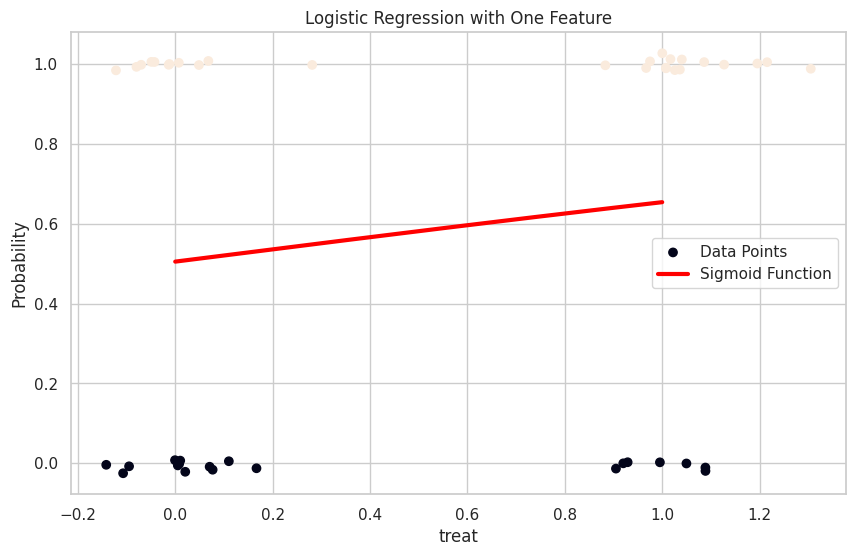

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

feature_visualize = ['treat']
X, y = df_encoded[feature_visualize], df_encoded['choose_labeled']
model = LogisticRegression()
model.fit(X, y)

# Generate data points for the curve
X_test = np.linspace(X.min(), X.max(), 300)
# Predict probabilities for the positive class
probabilities = model.predict_proba(X_test.reshape(-1, 1))[:, 1]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X.values.reshape(-1)+np.random.randn(len(X))*0.1, y.values+np.random.randn(len(y))*0.01, c=y, zorder=20, label='Data Points')
plt.plot(X_test, probabilities, color='red', linewidth=3, label='Sigmoid Function')

# Formatting plot
plt.xlabel(feature_visualize[0])
plt.ylabel('Probability')
plt.title('Logistic Regression with One Feature')
plt.legend()
plt.show()

In [ ]:
# from mpl_toolkits.mplot3d import Axes3D

# # Assuming model is already fitted with at least 3 features
# # For visualization, we will use the first two features for X, Y and the predicted probability for Z
# feature_visualize = ['treat','age']
# X, y = df_encoded[feature_visualize], df_encoded['choose_labeled']
# model = LogisticRegression()
# model.fit(X, y)

# fig = plt.figure(figsize=(12, 8))
# ax = fig.add_subplot(111, projection='3d')

# feature_visualize = ['treat','age']
# # Plotting data points
# ax.scatter(X.iloc[:][feature_visualize[0]]+np.random.randn(len(y))*0.1,
#            X.iloc[:][feature_visualize[1]]+np.random.randn(len(y))*0.1,
#            y+np.random.randn(len(y))*0.1, c=y, cmap='rainbow', marker='o', s=100, edgecolor='k', label='Data Points')

# # Creating a mesh to plot the decision boundary
# x_range = np.linspace(X.iloc[:][feature_visualize[0]].min(), X.iloc[:][feature_visualize[0]].max(), 100)
# y_range = np.linspace(X.iloc[:][feature_visualize[1]].min(), X.iloc[:][feature_visualize[1]].max(), 100)
# x_mesh, y_mesh = np.meshgrid(x_range, y_range)
# z_mesh = model.predict_proba(np.c_[x_mesh.ravel(), y_mesh.ravel()])[:, 1].reshape(x_mesh.shape)

# # Plotting the sigmoid plane
# ax.plot_surface(x_mesh, y_mesh, z_mesh, cmap='coolwarm', alpha=0.3)

# ax.set_xlabel(feature_visualize[0])
# ax.set_ylabel(feature_visualize[1])
# ax.set_zlabel('Probability')
# ax.set_title('3D Logistic Regression Decision Boundary')

# plt.legend()
# plt.show()

In [ ]:
df_encoded.to_csv("abtest_encoded.csv")

In [ ]:
df.to_csv("abtest_cleaned.csv")

In [ ]:
df_reg_interact.to_csv("abtest_regression.csv")